# **Credit Card Fraud Detection - Preprocessing and Data Preparation**

## 📌 **Objective**
Credit card fraud detection is a **critical problem** in the financial industry. Due to the **highly imbalanced nature** of fraudulent vs. non-fraudulent transactions, detecting fraud accurately is challenging. 

This notebook focuses on **preprocessing and preparing** the dataset for fraud detection using **machine learning and deep learning models**. The following steps are covered:

## 🔹 **Workflow Overview**
1. **Loading Required Libraries**  
   - Import essential libraries for **data processing, visualization, machine learning, and deep learning**.
   - Ensure compatibility with TensorFlow/Keras for model training.

2. **Loading and Exploring the Dataset**  
   - Load the dataset and perform an initial inspection.
   - Identify missing values (if any) and understand the feature distributions.

3. **Class Distribution Analysis**  
   - Since fraud detection is an **imbalanced classification problem**, we analyze the distribution of fraudulent and non-fraudulent transactions.

4. **Feature Scaling and Data Splitting**  
   - Standardizing the `Amount` feature to ensure consistent feature scaling.
   - Splitting the dataset into **training, validation, and test sets** for effective model evaluation.

5. **Defining a Custom Loss Function (Focal Loss)**  
   - Due to class imbalance, we implement **Focal Loss**, which assigns higher weight to misclassified instances.
   - This helps the model focus more on **fraudulent transactions** during training.

---

## 🔹 **Dataset Overview**
The dataset used in this project is obtained from **European credit card transactions**, containing **PCA-transformed features** (`V1` to `V28`), a **Time** variable, and an **Amount** column.

- **Features (`V1` to `V28`)**: Transformed using Principal Component Analysis (PCA).
- **Time**: Represents the seconds elapsed since the first transaction.
- **Amount**: Transaction amount (to be standardized).
- **Class**: Target variable (`0 = Normal Transaction`, `1 = Fraudulent Transaction`).

---

## ⚡ **Why is Preprocessing Important?**
- The dataset is **highly imbalanced**, making it difficult for models to detect fraud without proper handling.
- **Scaling numerical features** ensures all variables contribute equally during model training.
- **Train-validation-test split** prevents data leakage and ensures robust model evaluation.
- **Focal Loss** improves fraud detection by reducing bias toward majority-class transactions.

This notebook will **prepare the dataset for fraud detection models** while ensuring best practices for handling imbalanced data. Let's get started! 🚀



## **1. Importing Required Libraries**

   Before working with the dataset, we need to import essential libraries for data processing, visualization, and model evaluation.

- `numpy` and `pandas` for efficient data manipulation.
- `seaborn` and `matplotlib` for exploratory data analysis (EDA).
- `scikit-learn` for data preprocessing, model evaluation, and performance metrics.
- `tensorflow` and `keras` for deep learning implementation.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K


## **2. Loading and Exploring the Dataset**

Load the dataset and perform an initial exploration to:
- Understand its structure.
- Identify missing values.
- Gain insights into its characteristics.


In [3]:
# ✅ Load Data (Update Path!)
data_path = "/Users/adityaiyer/Desktop/Credit-Card-Fraud-Detection/data/creditcard.csv"  # Adjust if needed
df = pd.read_csv(data_path)

# ✅ Basic Info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 First 5 rows:\n", df.head())
print("\n🔹 Missing Values Per Column:\n", df.isnull().sum())
print("\n🔹 Statistical Summary:\n", df.describe())



🔹 Dataset Shape: (284807, 31)

🔹 First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14126

## **3. Class Distribution Analysis**

Credit card fraud detection is a highly **imbalanced classification problem**, meaning that fraudulent transactions are significantly fewer compared to non-fraudulent ones.  It is crucial to analyze the distribution of both fraud and non-fraud cases to:
- Understand the dataset imbalance.
- Determine the necessity of resampling techniques.
- Assess the impact of class imbalance on model performance.


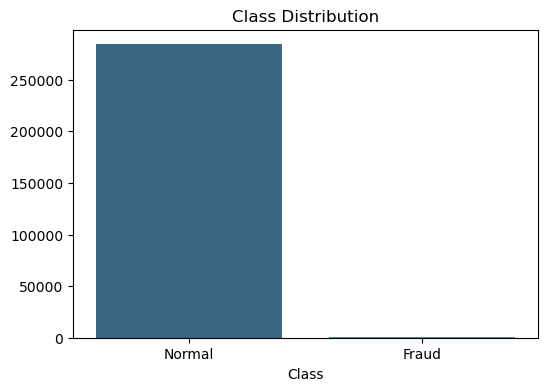

Number of normal transactions: 284315
Number of fraud transactions: 492


In [4]:
count_classes = df['Class'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count_classes.index, y=count_classes.values, palette='viridis')
plt.title("Class Distribution")
plt.xticks([0,1], ["Normal","Fraud"])
plt.show()

print("Number of normal transactions:", count_classes[0])
print("Number of fraud transactions:", count_classes[1])


## 4. Feature Scaling and Data Splitting

The dataset contains **anonymized Principal Component Analysis (PCA) transformed features** (`V1` to `V28`), which are already standardized. However, the `Amount` feature remains untransformed and **needs to be standardized** to ensure consistency across all features.  

To **evaluate model performance reliably**, we **split the dataset** into training, validation, and test sets.

---

### ⚙️ **Key Steps**

### 🔹 1. Standardizing the `Amount` Feature  
- The `Amount` feature is not yet scaled, unlike PCA-transformed features.  
- We apply **StandardScaler** to normalize it for optimal model training.

### 🔹 2. Splitting the Dataset  
- The dataset is divided into:  
  - 📌 **Training Set (70%)** – Used to train the model.  
  - 📌 **Validation Set (15%)** – Used for **hyperparameter tuning** and preventing overfitting.  
  - 📌 **Test Set (15%)** – Used to evaluate the model’s **final performance on unseen data**.  

---


In [5]:
X = df.drop("Class", axis=1)
y = df["Class"].values

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Scale (StandardScaler or MinMaxScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("Train:", X_train_scaled.shape, "Val:", X_val_scaled.shape, "Test:", X_test_scaled.shape)


Train: (159491, 30) Val: (39873, 30) Test: (85443, 30)


## 5. Implementing Focal Loss for Handling Class Imbalance

Fraud detection datasets are highly imbalanced, with fraudulent transactions being significantly fewer than non-fraudulent ones. Using **standard Binary Cross-Entropy loss** may lead the model to favor the majority class (non-fraudulent transactions), reducing its ability to detect fraud. **Focal Loss** dynamically adjusts the loss function to **assign higher importance to misclassified fraud cases**, improving the model’s ability to detect fraudulent transactions.


### ⚙️ **Key Concept: Focal Loss**
- Focal Loss is an enhancement of **Binary Cross-Entropy (BCE)** that:
  - **Down-weights easy-to-classify samples** (majority class).
  - **Increases the loss for hard-to-classify samples** (fraud cases).
  - Helps the model focus on the **minority fraud class** to improve classification performance.

### 🔹 **Mathematical Formula**
\[
FL(p_t) = - \alpha_t (1 - p_t)^{\gamma} \log(p_t)
\]
Where:
- **\( p_t \)** is the predicted probability for the true class.
- **\( \alpha_t \)** is a weighting factor to balance class imbalance.
- **\( \gamma \)** is the focusing parameter (higher values make the model focus more on hard examples).

### ✅ **Why Use Focal Loss?**
✔ Reduces the effect of **class imbalance**.  
✔ Encourages the model to **learn harder fraud cases**.  
✔ Prevents the model from being biased toward non-fraudulent transactions.  


In [6]:
def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal loss for binary classification.
    gamma > 1 penalizes easy examples
    alpha balances weighting of classes (0 < alpha < 1)
    """
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        # Clip predictions to avoid NaN
        epsilon = 1e-7
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        
        cross_entropy = -y_true * K.log(y_pred) - (1.0 - y_true)*K.log(1.0 - y_pred)
        weight = alpha * y_true * tf.pow((1.0 - y_pred), gamma) + \
                 (1.0 - alpha) * (1.0 - y_true) * tf.pow(y_pred, gamma)
        
        loss = weight * cross_entropy
        return tf.reduce_mean(loss)
    
    return focal_loss_fixed


In [10]:
# ✅ 9. Save the Processed Data for Later Use
processed_data_path = "/Users/adityaiyer/Desktop/Credit-Card-Fraud-Detection/data/processed"

# Ensure directory exists before saving
import os
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

np.save(f"{processed_data_path}/X_train.npy", X_train_scaled)
np.save(f"{processed_data_path}/X_val.npy", X_val_scaled)
np.save(f"{processed_data_path}/X_test.npy", X_test_scaled)
np.save(f"{processed_data_path}/y_train.npy", y_train)
np.save(f"{processed_data_path}/y_val.npy", y_val)
np.save(f"{processed_data_path}/y_test.npy", y_test)

print("\n✅ Preprocessed Data Successfully Saved!")
print(f"🔹 Processed Data Path: {processed_data_path}")


✅ Preprocessed Data Successfully Saved!
🔹 Processed Data Path: /Users/adityaiyer/Desktop/Credit-Card-Fraud-Detection/data/processed
